In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
apple_stk=pd.read_csv("AAPL.csv")

In [3]:
apple_stk

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


# Splitting Data to Train & Test

In [4]:
a = apple_stk
size = int(len(a) * 0.75)
print(size)
Train, Test = a[0:size], a[size:len(a)]

1508


In [5]:
X = apple_stk['Close'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

In [6]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
1503,2017-12-21,174.169998,176.020004,174.100006,175.009995,168.705246,20949900
1504,2017-12-22,174.679993,175.419998,174.500000,175.009995,168.705246,16349400
1505,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.425217,33185500
1506,2017-12-27,170.100006,170.779999,169.710007,170.600006,164.454132,21498200


In [7]:
Test

,Date,Open,High,Low,Close,Adj Close,Volume
1508,2017-12-29,170.520004,170.589996,169.220001,169.229996,163.133469,25999900
1509,2018-01-02,170.160004,172.300003,169.259995,172.259995,166.054321,25555900
1510,2018-01-03,172.529999,174.550003,171.960007,172.229996,166.025375,29517900
1511,2018-01-04,172.539993,173.470001,172.080002,173.029999,166.796555,22434600
1512,2018-01-05,173.440002,175.369995,173.050003,175.000000,168.695572,23660000
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [8]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
hwe_model_mul_sea = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit() 
pred_hwe_mul_sea_train = hwe_model_mul_sea.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_mul_sea_test = hwe_model_mul_sea.predict(start = Test.index[0],end = Test.index[-1])
print("MAPE for Train", MAPE(pred_hwe_mul_sea_train,Train.Close))
print("MAPE for Test", MAPE(pred_hwe_mul_sea_test,Test.Close)) 

MAPE for Train 1.098853456620375
MAPE for Test 8.563933679671969


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [11]:
rmse_hw_mul_sea_train = sqrt(mean_squared_error(Train.Close, pred_hwe_mul_sea_train))
rmse_hw_mul_sea_test = sqrt(mean_squared_error(Test.Close, pred_hwe_mul_sea_test))
print('Train RMSE: %.3f' % rmse_hw_mul_sea_train)
print('Test RMSE: %.3f' % rmse_hw_mul_sea_test)


Train RMSE: 1.512
Test RMSE: 23.776


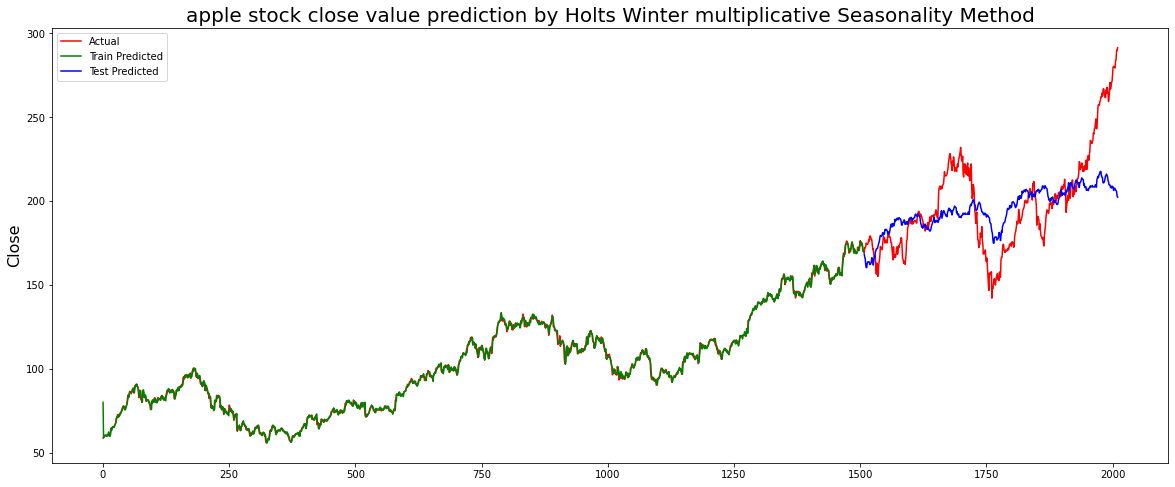

In [12]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_train, color='green',label='Train Predicted')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter multiplicative Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

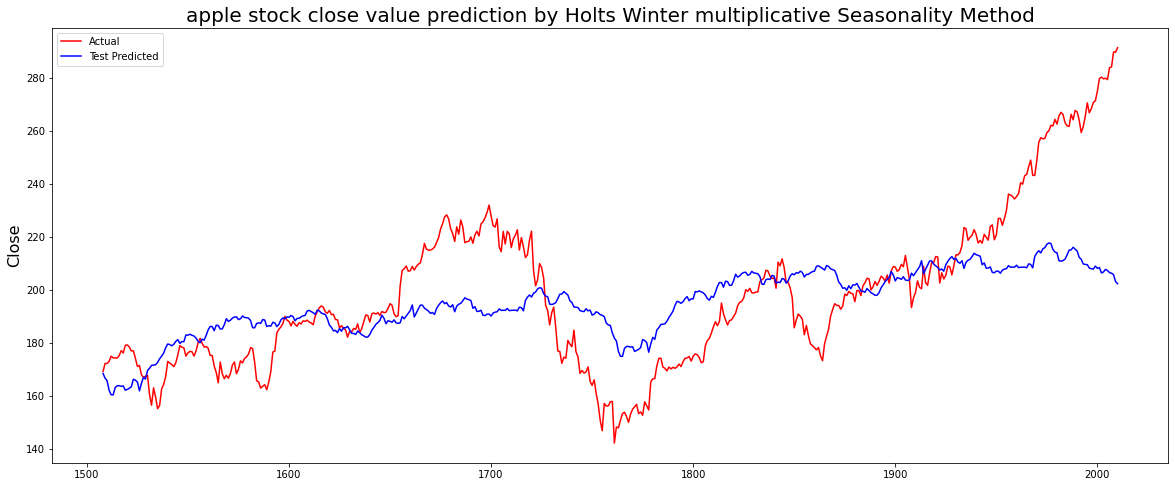

In [13]:
plt.figure(figsize=(20,8))
plt.plot(Test['Close'], color='red',label='Actual')
plt.plot(pred_hwe_mul_sea_test, color='blue',label='Test Predicted')
plt.title('apple stock close value prediction by Holts Winter multiplicative Seasonality Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Final Model - Holts Winter Multiplicative Seasonality model combining train and test

In [14]:
final_hwe_model_mul_add = ExponentialSmoothing(apple_stk["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit()
final_pred_hwe_mul_add = final_hwe_model_mul_add.predict(start = apple_stk.index[0],end = apple_stk.index[-1])
print("MAPE :",MAPE(final_pred_hwe_mul_add, apple_stk.Close))

MAPE : 1.14882630022525


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [15]:
rmse_final = sqrt(mean_squared_error(apple_stk.Close, final_pred_hwe_mul_add))
print('RMSE: %.3f' % rmse_final)

RMSE: 2.002


2011    291.284871
2012    287.650815
2013    279.781469
2014    280.326647
2015    274.311478
2016    271.515200
2017    272.172008
2018    274.648526
2019    274.507970
2020    274.136870
2021    275.782254
2022    276.320907
2023    276.677289
2024    277.112280
2025    275.550748
2026    275.487882
2027    277.432043
2028    277.949269
2029    274.546505
2030    270.664843
2031    274.568016
2032    276.248999
2033    275.431170
2034    279.672128
2035    278.156067
2036    276.894718
2037    278.276094
2038    277.102239
2039    275.977518
2040    278.413642
dtype: float64


<AxesSubplot:>

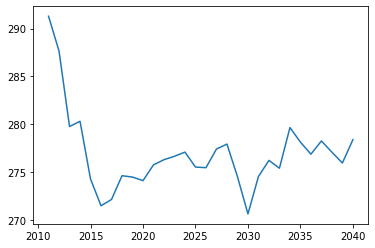

In [16]:
#Forecasting for next 30 time periods
final_forecast=final_hwe_model_mul_add.forecast(30)
print(final_forecast)
final_forecast.plot()

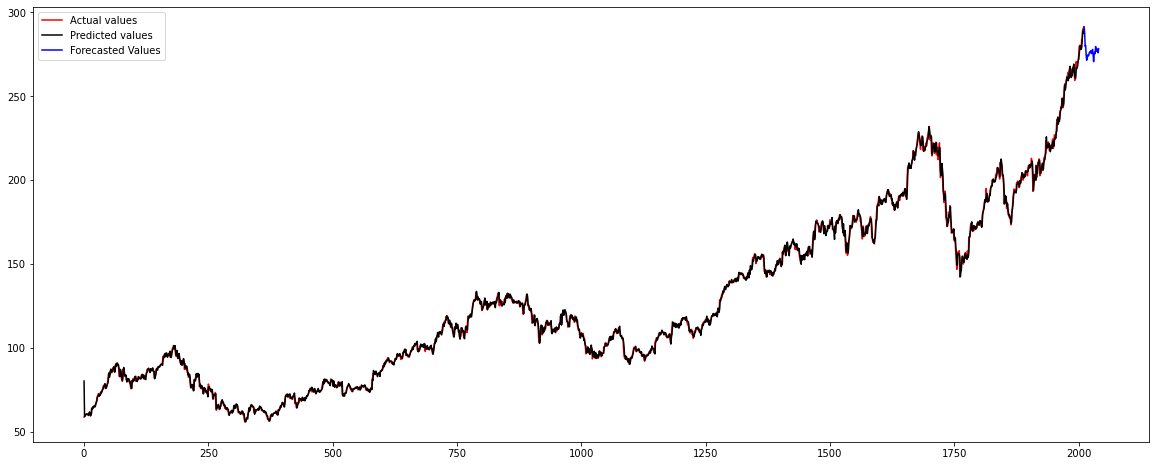

In [17]:
plt.figure(figsize=(20,8))
plt.plot(apple_stk.Close, color='red',label='Actual values')
plt.plot(final_pred_hwe_mul_add, color='black',label='Predicted values')
plt.plot(final_forecast, color='blue',label='Forecasted Values')
plt.legend()
plt.show()

In [ ]:
##saving final model to pickle file

In [18]:
import pickle


In [19]:
with open(file = "Final_Model.pkl",mode='wb') as f:
    pickle.dump(final_hwe_model_mul_add, f)